In [ ]:
#Solution for A Problem with Presidents
#Import the necessary modules
import pandas as pd
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plot
import random
from os import stat

In [ ]:
#Import the CSV file by creating a data frame from the dataset
df=pd.read_csv('U.S._Presidents_Birth_and_Death_Information.csv')

#Ensure data is imported successfully
df

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH
0,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","Dec 14, 1799","Mount Vernon, Va."
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass."
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va."
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va."
4,James Monroe,"Apr 28, 1758","Westmoreland Co., Va.","July 4, 1831","New York, New York"
5,John Quincy Adams,"July 11, 1767","Quincy, Mass.","Feb 23, 1848","Washington, D.C."
6,Andrew Jackson,"Mar 15, 1767","Waxhaws, No/So Carolina","June 8, 1845","Nashville, Tennessee"
7,Martin Van Buren,"Dec 5, 1782","Kinderhook, New York","July 24, 1862","Kinderhook, New York"
8,William Henry Harrison,"Feb 9, 1773","Charles City Co., Va.","Apr 4, 1841","Washington, D.C."
9,John Tyler,"Mar 29, 1790","Charles City Co., Va.","Jan 18, 1862","Richmond, Va."


In [ ]:
#Since the data is in file we convert necssary columns to 
#Datatypes so that we can perform actions conveniently
df=df[:-1]
df['BIRTH'] = pd.to_datetime(df['BIRTH DATE'])
df['DEATH'] = pd.to_datetime(df['DEATH DATE'])

<ipython-input-4-a53d7a36ae50>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BIRTH'] = pd.to_datetime(df['BIRTH DATE'])
<ipython-input-4-a53d7a36ae50>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEATH'] = pd.to_datetime(df['DEATH DATE'])


In [ ]:
#Update place of death for presidents who are alive and well for further calculations
update_dp = df.select_dtypes(exclude=['datetime'])

#Remove the NaN Values
df[update_dp.columns] = update_dp.fillna('Living')

update_dd = df.select_dtypes(include=['datetime'])
df[update_dd.columns] = update_dd.fillna(dt.now())
#Clean up data to remove some informational content (which cannot be used for any operations)
df = df.drop(df.index[-1])

#Updated Data Frame
df.head()

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,BIRTH,DEATH
0,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","Dec 14, 1799","Mount Vernon, Va.",1732-02-22,1799-12-14
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass.",1735-10-30,1826-07-04
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va.",1743-04-13,1826-07-04
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va.",1751-03-16,1836-06-28
4,James Monroe,"Apr 28, 1758","Westmoreland Co., Va.","July 4, 1831","New York, New York",1758-04-28,1831-07-04


In [ ]:
# Adding todays date as death date to make calculations easier
today = dt.now().strftime("%Y-%m-%d")
df["living"] = df["DEATH"]
df["living"].fillna(today, inplace=True)

# Calculating lived_dates, lived_months and lived_years
difference_in_dates = pd.DatetimeIndex(df["living"]) - pd.DatetimeIndex(df["BIRTH"])
df["lived_days"] = (difference_in_dates/ np.timedelta64(1, "D"))
df["lived_months"] = difference_in_dates / np.timedelta64(1, "M")
df["lived_years"] = difference_in_dates / np.timedelta64(1, "Y")


In [ ]:
df.head()

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,BIRTH,DEATH,living,lived_days,lived_months,lived_years
0,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","Dec 14, 1799","Mount Vernon, Va.",1732-02-22,1799-12-14,1799-12-14,24767.0,813.716914,67.809743
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass.",1735-10-30,1826-07-04,1826-07-04,33119.0,1088.120906,90.676742
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va.",1743-04-13,1826-07-04,1826-07-04,30397.0,998.689911,83.224159
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va.",1751-03-16,1836-06-28,1836-06-28,31150.0,1023.429639,85.285803
4,James Monroe,"Apr 28, 1758","Westmoreland Co., Va.","July 4, 1831","New York, New York",1758-04-28,1831-07-04,1831-07-04,26729.0,878.178197,73.181516


In [ ]:
# Sorting values based on days lived till now
t10_longest = df.sort_values(by=['lived_days'], ascending=False).head(10)
t10_shortest = df.sort_values(by=['lived_days']).head(10)

# Revert the NaN subsitution
t10_longest["DEATH"] = t10_longest["DEATH"].replace(today, np.nan)
t10_shortest["DEATH"] = t10_shortest["DEATH"].replace(today, np.nan)
t10_longest

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,BIRTH,DEATH,living,lived_days,lived_months,lived_years
37,Jimmy Carter,"Oct 1, 1924","Plains, Georgia",Living,Living,1924-10-01,2023-01-12 12:57:58.519931,2023-01-12 12:57:58.519931,35897.540261,1179.409524,98.284127
39,George Bush,"June 12, 1924","Milton, Mass.","Nov 30, 2018","Houston, Texas",1924-06-12,2018-11-30 00:00:00.000000,2018-11-30 00:00:00.000000,34504.000000,1133.624920,94.468743
36,Gerald Ford,"July 14, 1913","Omaha, Nebraska","Dec 26, 2006","Rancho Mirage, Cal.",1913-07-14,2006-12-26 00:00:00.000000,2006-12-26 00:00:00.000000,34133.000000,1121.435758,93.452980
38,Ronald Reagan,"Feb 6, 1911","Tampico, Illinois","June 5, 2004","Los Angeles, Cal.",1911-02-06,2004-06-05 00:00:00.000000,2004-06-05 00:00:00.000000,34088.000000,1119.957289,93.329774
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass.",1735-10-30,1826-07-04 00:00:00.000000,1826-07-04 00:00:00.000000,33119.000000,1088.120906,90.676742
29,Herbert Hoover,"Aug 10, 1874","West Branch, Iowa","Oct 20, 1964","New York, New York",1874-08-10,1964-10-20 00:00:00.000000,1964-10-20 00:00:00.000000,32943.000000,1082.338446,90.194871
31,Harry S. Truman,"May 8, 1884","Lamar, Missouri","Dec 26, 1972","Kansas City, Missouri",1884-05-08,1972-12-26 00:00:00.000000,1972-12-26 00:00:00.000000,32373.000000,1063.611162,88.634264
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va.",1751-03-16,1836-06-28 00:00:00.000000,1836-06-28 00:00:00.000000,31150.000000,1023.429639,85.285803
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va.",1743-04-13,1826-07-04 00:00:00.000000,1826-07-04 00:00:00.000000,30397.000000,998.689911,83.224159
35,Richard Nixon,"Jan 9, 1913","Yorba Linda, Cal.","Apr 22, 1994","New York, New York",1913-01-09,1994-04-22 00:00:00.000000,1994-04-22 00:00:00.000000,29688.000000,975.395799,81.282983


In [ ]:
t10_shortest

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,BIRTH,DEATH,living,lived_days,lived_months,lived_years
33,John F. Kennedy,"May 29, 1917","Brookline, Mass.","Nov 22, 1963","Dallas, Texas",1917-05-29,1963-11-22 00:00:00.000000,1963-11-22 00:00:00.000000,16978.000000,557.810222,46.484185
19,James A. Garfield,"Nov 19, 1831","Cuyahoga Co., Ohio","Sep 19, 1881","Elberon, New Jersey",1831-11-19,1881-09-19 00:00:00.000000,1881-09-19 00:00:00.000000,18202.000000,598.024600,49.835383
10,James K. Polk,"Nov 2, 1795","Mecklenburg Co., N.C.","June 15, 1849","Nashville, Tennessee",1795-11-02,1849-06-15 00:00:00.000000,1849-06-15 00:00:00.000000,19583.000000,643.397195,53.616433
15,Abraham Lincoln,"Feb 12, 1809","LaRue Co., Kentucky","Apr 15, 1865","Washington, D.C.",1809-02-12,1865-04-15 00:00:00.000000,1865-04-15 00:00:00.000000,20516.000000,674.050802,56.170900
20,Chester Arthur,"Oct 5, 1829","Fairfield, Vermont","Nov 18, 1886","New York, New York",1829-10-05,1886-11-18 00:00:00.000000,1886-11-18 00:00:00.000000,20863.000000,685.451447,57.120954
27,Warren G. Harding,"Nov 2, 1865","Morrow County, Ohio","Aug 2, 1923","San Francisco, Cal.",1865-11-02,1923-08-02 00:00:00.000000,1923-08-02 00:00:00.000000,21091.000000,692.942360,57.745197
23,William McKinley,"Jan 29, 1843","Niles, Ohio","Sep 14, 1901","Buffalo, New York",1843-01-29,1901-09-14 00:00:00.000000,1901-09-14 00:00:00.000000,21412.000000,703.488778,58.624065
24,Theodore Roosevelt,"Oct 27, 1858","New York, New York","Jan 6, 1919","Oyster Bay, New York",1858-10-27,1919-01-06 00:00:00.000000,1919-01-06 00:00:00.000000,21985.000000,722.314627,60.192886
28,Calvin Coolidge,"July 4, 1872","Plymouth, Vermont","Jan 5, 1933","Northampton, Mass.",1872-07-04,1933-01-05 00:00:00.000000,1933-01-05 00:00:00.000000,22099.000000,726.060083,60.505007
42,Barack Obama,"Aug 4, 1961","Honolulu, Hawaii",Living,Living,1961-08-04,2023-01-12 12:57:58.519931,2023-01-12 12:57:58.519931,22441.540261,737.314204,61.442850


In [ ]:
# Extracting necessary cols
lived_days_col = df["lived_days"]
lived_years_col = df["lived_years"].astype(int)
value_counts = lived_years_col.value_counts()

In [ ]:
# Calculating weights
weights = []
for i in range(len(lived_years_col)):
    year = lived_years_col[i]
    # Using the frequency of a year as the weight
    weights.append(value_counts[year])
weights = np.array(weights)
# Getting weighted values
weighted_values = weights * lived_days_col

In [ ]:
# Calculating the statistics
mean = lived_days_col.mean()
weighted_mean = weighted_values.sum() / weights.sum()
median = lived_days_col.median()
mode = lived_years_col.mode() * 365
max = lived_days_col.max()
min = lived_days_col.min()
std = lived_days_col.std()

In [ ]:
# Tabularizing by appending everything to a dictionary
data = {
    "Statistic": ["Mean Age", "Weighted Mean Age", "Median Age", "Mode Age", "Maximum Age", "Minimum Age", "Standard Deviation"],
    "Age (Days)": [mean, weighted_mean, median, list(mode), max, min, std],
    "Age (Years)": [mean / 365, weighted_mean / 365, median / 365, [x / 365 for x in list(mode)], max / 365, min / 365, std / 365]
}

# Creating dataframe from the dictionary
df_stats = pd.DataFrame.from_dict(data)
df_stats.style.hide_index()

Statistic,Age (Days),Age (Years)
Mean Age,26325.213048,72.123871
Weighted Mean Age,26252.899128,71.925751
Median Age,26030.000000,71.315068
Mode Age,[24455],[67.0]
Maximum Age,35897.540261,98.349425
Minimum Age,16978.000000,46.515068
Standard Deviation,4671.554524,12.798780


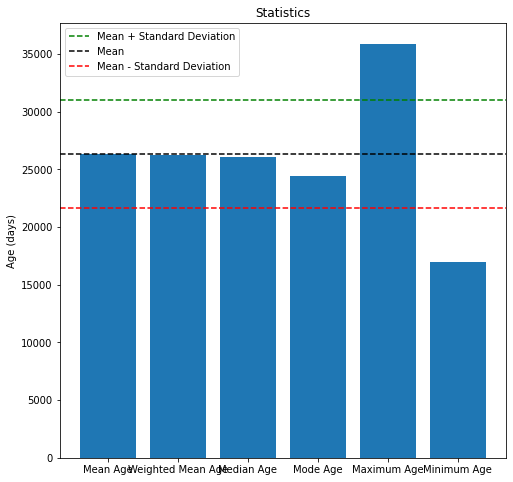

In [ ]:
# Plotting the statistics
x_axis = df_stats["Statistic"]
x_axis = x_axis[:-1].to_list()
x = range(len(x_axis))

yC = df_stats["Age (Days)"]
yC = yC[:-1].to_list()


plot.figure(figsize=(8, 8))
plot.bar(x, yC)
plot.ylabel("Age (days)")
plot.title("Statistics")

plot.axhline(y = mean + std, color='green', linestyle='--', label="Mean + SD") # For Years: (mean + std_dev)/365
plot.axhline(y = mean, color='black', linestyle='--', label="Mean") # For years: mean/365
plot.axhline(y = mean - std, color='red', linestyle='--', label="Mean - SD") # For years: (mean - std_dev)/365
plot.xticks(x, x_axis)
plot.legend(labels=['Mean + Standard Deviation', 'Mean', 'Mean - Standard Deviation'])
plot.show()

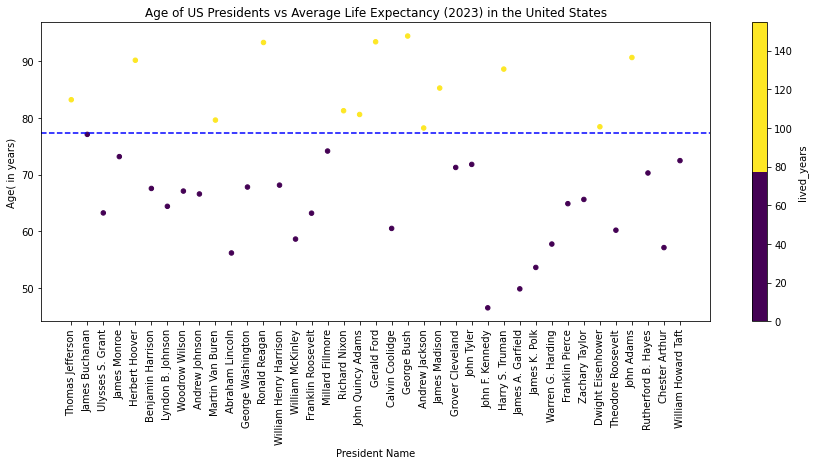

In [ ]:
df = df.sort_values(by=['BIRTH DATE'])
df = df[df['LOCATION OF DEATH'] != 'Living']

cmap=plot.get_cmap('viridis', 2)
df.plot(kind = 'scatter', x='PRESIDENT', y='lived_years', c= 'lived_years', cmap=cmap, vmin = 0, vmax = 77.28*2, sharex = False)
plot.axhline(y = 77.28, color = 'blue', linestyle = '--', label='Mean')
plot.rcParams["figure.figsize"] = (15,5.5)
plot.ylabel("Age( in years)")
plot.xlabel("President Name")
plot.title("Age of US Presidents vs Average Life Expectancy (2023) in the United States")
plot.xticks(rotation=90)
plot.show()

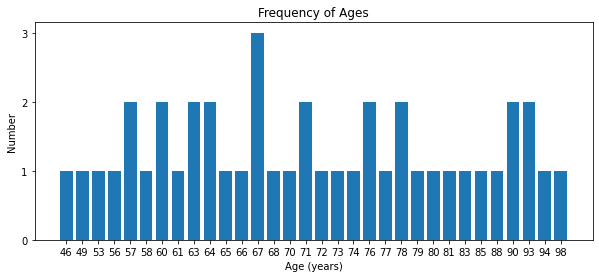

In [72]:
# Frequency Distribution plot to verify the mode. 

value_counts1 = lived_years_col.value_counts()

xCoords = []
for i in range(len(value_counts1)):
    xCoords.append(i)
s=pd.Series(value_counts1)


plot.figure(figsize=(10, 4))
plot.bar(xCoords, s.sort_index(ascending=True))
plot.xlabel("Age (years)")
plot.ylabel("Number")
plot.title("Frequency of Ages")

plot.xticks(xCoords, s.sort_index(ascending=True).keys())
plot.yticks(range(value_counts1.max() + 1))
plot.show()